In [1]:
import numpy as np
import torch 
import torchvision # thu vien xu ly trong computer vision
from torchvision import models,transforms
from PIL import Image
import matplotlib.pyplot as plt
import json


In [2]:
use_pretrained = True
net = models.vgg16(pretrained = use_pretrained) #goi ham vgg trong models
net.eval()
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [3]:
# class tien xu ly
class BaseTransform():
    def __init__(self,resize,mean,std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),#cat ra phan giua buc anh bang size minh muon
            transforms.ToTensor(),#chuyen ve dang tensor
            transforms.Normalize(mean,std) # chuyen ve dang tieu chuan 
            
        ])
    def __call__(self,img):
        return self.base_transform(img)
    

In [4]:
!ls 


data			   load_model.ipynb	    sequential_model.ipynb
imagenet_class_index.json  nn_module_pytorch.ipynb


In [5]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [6]:
!mv dog.jpg data

mv: cannot stat 'dog.jpg': No such file or directory


In [7]:
!ls data

dog.jpg


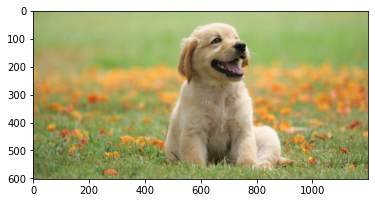

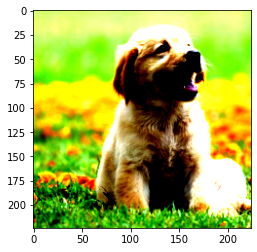

In [8]:
img_file_path ="./data/dog.jpg"
img = Image.open(img_file_path) # pillow goi anh 

plt.imshow(img)
plt.show()

# resize cho 224 224 chophu hop model vgg16
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = BaseTransform(resize, mean, std) # tao ra tranform goi instance
img_transformed = transform(img) # tranform anh

#(chanels, height, width) -> (height, width, chanels)
#clip(0,1) chuyen pizel ve dnag 0 va 1 

img_transformed = img_transformed.numpy().transpose(1,2,0)
img_transformed = np.clip(img_transformed,0,1)

plt.imshow(img_transformed)
plt.show()

In [9]:
class Predictor():
    def __init__(self, class_index):
            # thong so chua index nhung cai nhan IMge NEt
        self.class_index = class_index
    
    def predict_max(self, out):
           # out la lop cuoi cung mang vgg16 (tensor)
        # detach cat thang out ra khoi net work -> chuyen ve numpy
        # argmax lay ra index cua thang trong ngoac 
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)]
        
        return predicted_label_name

class_index = json.load(open('./imagenet_class_index.json', 'r'))
predictor = Predictor(class_index)

In [10]:

img_file_path = './data/dog.jpg'
img = Image.open(img_file_path)

# resize cho 224 224 chophu hop model vgg16
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
# tao ra tranform goi instance

transform = BaseTransform(resize, mean, std)
# tranform anh
img_transformed = transform(img)
#them 1 dimention
img_transformed = img_transformed.unsqueeze_(0)



out = net(img_transformed)
result = predictor.predict_max(out)
print("Result is:", result)

Result is: ['n02099601', 'golden_retriever']
